# **Homework Assignment: Is a *queen* really just a *king*, minus a *man*, plus a *woman*?**

--------------



In class, we dealt with **embeddings** trained for **sentiment classification**. These embeddings are optimized to separate *positive* from *negative* expressions and **do not encode deeper semantic information**.

However, in modern natural language processing, there exist other embeddings — such as those from **BERT**, **word2vec**, or **GloVe** — that **do capture semantic structure**. These models are trained on large corpora, and their embeddings often allow for meaningful **vector arithmetic**, like the famous:


```
embedding("king") - embedding("man") + embedding("woman") ≈ embedding("queen")
```

This homework explores **semantic vector relationships** using such pretrained embeddings.

## **The Objective**

Your task is to:

1. Construct semantic classes of word pairs.
2. Visualize them using PCA.
3. Explore arithmetic operations in embedding space.

## **Tasks & Deliverables**

### 1. **Semantic Pair Classes**

- You must gather **at least 10 classes** of semantically related word pairs.
- Each class must contain **at least 5 pairs**.
- That gives a **minimum total of 100 unique words** (10 classes x 5 pairs x 2 words per pair).

Two example classes:

**Class 1: Gender**

- (king, queen)
- (man, woman)
- (doctor, nurse)
- (prince, princess)
- *(you must add one more)*

**Class 2: Verb tense (past tense)**

- (bring, brought)
- (get, got)
- (like, liked)
- *(you must add two more)*

**Your job:**

- Invent or search for **at least 10 such classes**, including the examples above.
- Each class must be conceptually coherent.
- Other examples: singular/plural, country/capital, comparative/superlative, tool/user, job/object, etc.

### 2. **Global PCA (Across All Words)**

- Use PCA to reduce the **entire set of 100 word embeddings** to 2D, and plot it.
- Plot the additional **10 separate charts**, one for each class.
  - Each chart should display only the 10 words (5 pairs) of the given class.
- Points should be labeled with the words themselves.

### 3. **Local PCA (Per Class)**

- For each class (10 total), perform PCA **only** on the 10 words of that class.
- Plot these class-wise PCA visualizations as separate charts.
- Again, points should be labeled with the words.

**Total: 21 charts**
(1 global plot with 100 words + 10 global-space class plots + 10 local PCA class plots)

Charts should be presented in a self-explanatory manner with clear labels.

### 4. **Embedding Arithmetic**

For each class, choose **one example pair** (e.g., (king, queen)) and perform the operation:

```
embedding(B) - embedding(A) + embedding(C)
```

Where A and B form a known pair, and C is another base word.
For example:

```
embedding("king") - embedding("man") + embedding("woman")
```

* For each such result vector, find the **5 closest word embeddings** (using cosine similarity or Euclidean distance).
* Print the top 5 neighbors **with their distances**.
* Do this **once per class** (i.e., 10 times).

This will make it possible to verify if
 ```
embedding("queen") ≈ embedding("king") - embedding("man") + embedding("woman")
```
for the *gender*-related class.


### 5. **Discussion**

* Analyze and interpret your 21 plots.
* Discuss whether the vector relationships are preserved.
* Does PCA capture semantic differences?
* Are the closest words from the arithmetic meaningful?
* What kinds of relationships are captured, and what are not?
* Are some classes better behaved than others?


### 6. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.


## Acknowledgments

*This homework assignment was inspired by an idea from my master's student **Andrzej Małek**, to whom I would like to express my thanks.*


In [1]:
import csv
import sklearn

with open("semantic_word_pairs.csv", mode='r') as csvfile:
    data = []
    reader = csv.reader(csvfile)
    next(reader, None)
    for line in reader:
        
        data.append(line[1].lower().strip())
        data.append(line[2].lower().strip())

print(data)

['king', 'queen', 'man', 'woman', 'boy', 'girl', 'father', 'mother', 'prince', 'princess', 'bring', 'brought', 'get', 'got', 'like', 'liked', 'go', 'went', 'run', 'ran', 'tough', 'tougher', 'fast', 'faster', 'great', 'greater', 'happy', 'happier', 'tall', 'taller', 'hot', 'cold', 'light', 'dark', 'happy', 'sad', 'up', 'down', 'open', 'closed', 'noble', 'peasant', 'wealthy', 'poor', 'healthy', 'unhealthy', 'free', 'enslaved', 'famous', 'unknown', 'big', 'small', 'few', 'many', 'tiny', 'huge', 'short', 'long', 'narrow', 'wide', 'young', 'old', 'new', 'ancient', 'recent', 'past', 'early', 'late', 'modern', 'traditional', 'happiness', 'sorrow', 'anger', 'calm', 'fear', 'courage', 'joy', 'grief', 'love', 'hate', 'doctor', 'nurse', 'teacher', 'student', 'boss', 'employee', 'actor', 'director', 'soldier', 'general', 'walk', 'run', 'jump', 'fall', 'sit', 'stand', 'push', 'pull', 'climb', 'descend']


In [ ]:
import spacy
from sklearn.decomposition import PCA
import pandas as pd

# Załaduj model
nlp = spacy.load("en_core_web_md")

# Przygotuj wektory
embeddings = {word: nlp(word).vector for word in data}
vector = nlp("king").vector

print(vector)
print(vector.shape)

embedding_df = pd.DataFrame.from_dict(embeddings, orient="index")
embedding_df.index.name = "Word"

#Reducing dimension
pca = PCA(n_components=2)
reduced = pca.fit_transform(embedding_df.values)
pca_df = pd.DataFrame(reduced, columns=["PC1", "PC2"], index=embedding_df.index)

[-6.0644e-01 -5.1205e-01  6.4921e-03 -2.9194e-01 -5.6515e-01 -1.1523e-01
  7.7274e-02  3.3561e-01  1.1593e-01  2.3516e+00  5.1773e-02 -5.4229e-01
 -5.7972e-01  1.3220e-01  2.8430e-01 -7.9592e-02 -2.6762e-01  1.8301e-01
 -4.1264e-01  2.0459e-01  1.4436e-01 -1.8714e-01 -3.1393e-01  1.7821e-01
 -1.0997e-01 -2.5584e-01 -1.1149e-01  9.6212e-02 -1.6168e-01  4.0055e-01
 -2.6115e-01  5.3777e-01 -5.2382e-01  2.7637e-01  7.2191e-01  6.0405e-02
 -1.7922e-01  1.8020e-01 -1.4381e-01 -1.4795e-01 -8.1394e-02  5.8282e-02
  2.2964e-02 -2.6374e-01  1.0704e-01 -4.5425e-01 -1.9964e-01  3.7720e-01
 -9.7784e-02 -3.1999e-01 -7.8509e-02  6.1502e-01  7.1643e-02 -3.0930e-02
  2.1508e-01  2.5280e-01 -3.1643e-01  6.6698e-01  1.9813e-02 -3.2311e-01
  2.9266e-02 -4.1403e-02  2.8346e-01 -7.9143e-01  1.3327e-01  7.7231e-02
 -1.8724e-01 -3.3146e-01 -2.0797e-01 -6.9326e-01 -2.3412e-01 -6.8752e-02
  3.8252e-02 -3.2459e-01 -8.3609e-03  1.2945e-01 -2.8316e-01 -5.7546e-01
  2.4336e-01  5.6433e-01 -7.1285e-01 -5.4738e-03 -2

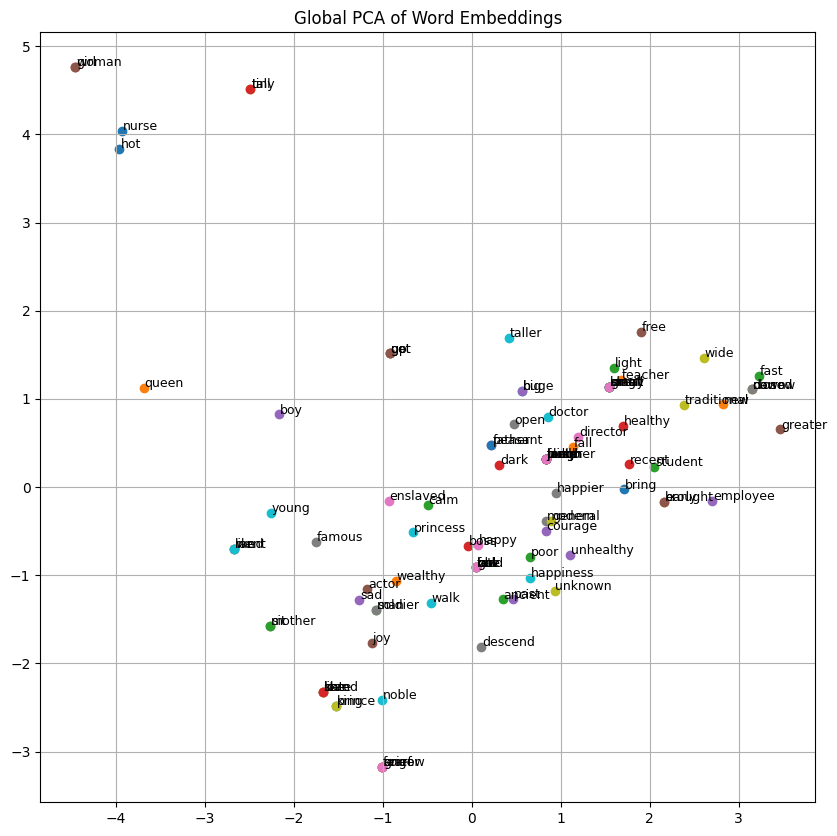

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for word, (x, y) in pca_df.iterrows():
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9)
plt.title("Global PCA of Word Embeddings")
plt.grid()
plt.show()